In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('albums2.csv')
print(df.shape)
df['album_release_date'] = pd.to_datetime(df['album_release_date'], format='%Y-%m-%d', errors='coerce')
df = df.drop_duplicates(subset='album_id')
df =df.dropna(subset=['genre','band_name','album_name','album_id'])
mask = ~df['album_name'].str.contains('live|edition|remaster|deluxe|\(', case=False, na=False)
df = df[mask]
df.reset_index(drop=True, inplace=True)
display(df.head())
dfgroup = df['genre'].value_counts()
df.to_csv('albums.csv',index=False)
df.info()

<>:6: SyntaxWarning: invalid escape sequence '\('
<>:6: SyntaxWarning: invalid escape sequence '\('
C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_22764\2147369109.py:6: SyntaxWarning: invalid escape sequence '\('
  mask = ~df['album_name'].str.contains('live|edition|remaster|deluxe|\(', case=False, na=False)


(94608, 5)


,genre,band_name,album_name,album_release_date,album_id
0,thrash metal,Metallica,72 Seasons,2023-04-14,6UwjRSX9RQyNgJ3LwYhr9i
1,thrash metal,Metallica,S&M2,2020-08-28,7Hc3m7konwS0ugyN8vJhNg
2,thrash metal,Metallica,Hardwired…To Self-Destruct,2016-11-18,7LwifLL1anaEd9eIIfIkx7
3,thrash metal,Metallica,Lulu,2011-01-01,3a1SJd8obHju43McHQew7J
4,thrash metal,Metallica,Death Magnetic,2008-01-01,3bK58rVcWBh3V3vxMLzi0V


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24413 entries, 0 to 24412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   genre               24413 non-null  object        
 1   band_name           24413 non-null  object        
 2   album_name          24413 non-null  object        
 3   album_release_date  22209 non-null  datetime64[ns]
 4   album_id            24413 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 953.8+ KB


genre,black metal,blackgaze,death metal,deathcore,djent,doom metal,drone metal,folk metal,funeral doom,glam metal,...,grindcore,industrial metal,metalcore,nu metal,nwobhm,power metal,progressive metal,sludge metal,symphonic metal,thrash metal
release_year,,,,,,,,,,,,,,,,,,,,,
1905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1960.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1969.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Release Year: 1905.0, Genre: power metal
Release Year: 1960.0, Genre: death metal
Release Year: 1967.0, Genre: glam metal
Release Year: 1967.0, Genre: nu metal
Release Year: 1968.0, Genre: folk metal
Release Year: 1968.0, Genre: thrash metal
Release Year: 1970.0, Genre: doom metal
Release Year: 1980.0, Genre: nwobhm
Release Year: 1980.0, Genre: progressive metal
Release Year: 1981.0, Genre: industrial metal
Release Year: 1982.0, Genre: blackgaze
Release Year: 1984.0, Genre: black metal
Release Year: 1985.0, Genre: grindcore
Release Year: 1987.0, Genre: sludge metal
Release Year: 1988.0, Genre: funeral doom
Release Year: 1991.0, Genre: metalcore
Release Year: 1992.0, Genre: goregrind
Release Year: 1992.0, Genre: symphonic metal
Release Year: 1994.0, Genre: drone metal
Release Year: 1998.0, Genre: deathcore
Release Year: 2005.0, Genre: djent


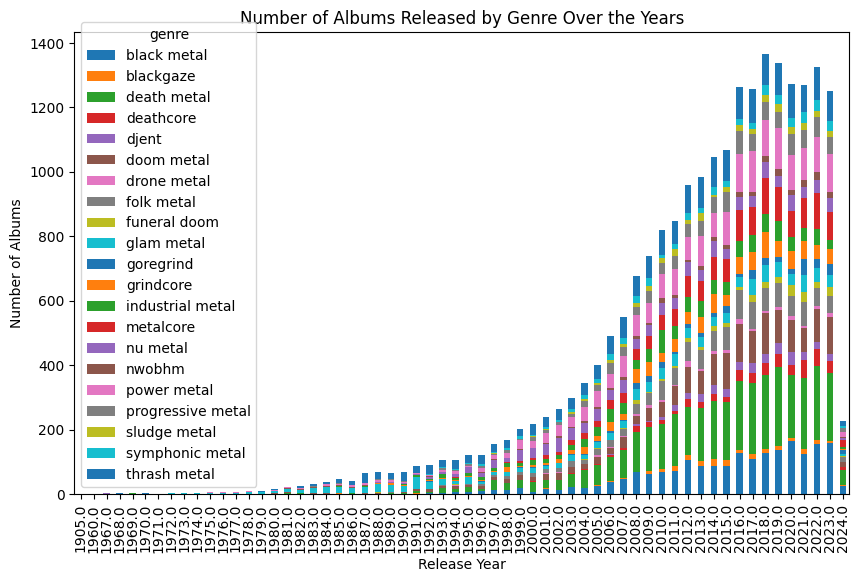

In [3]:
df['release_year'] = df['album_release_date'].dt.year
df_agg = df.groupby(['release_year', 'genre']).size().reset_index(name='count')
df_pivot = df_agg.pivot(index='release_year', columns='genre', values='count')
display(df_pivot.head())

# Keep track of printed columns
printed_columns = set()

# Iterate through DataFrame row by row
for index, row in df_pivot.iterrows():
    # Iterate through each element in the row
    for col, val in row.items():
        # Check if the value is not None and column hasn't been printed yet
        if pd.notna(val) and col not in printed_columns:
            print(f"Release Year: {index}, Genre: {col}")
            printed_columns.add(col)
    

# Plotting the data separately
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding a vertical line at x = 2006
ax.axvline(x=2006, color='r', linestyle='--')

# Set the title and labels
plt.title('Number of Albums Released by Genre Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Albums')

# Show the plot
plt.show()


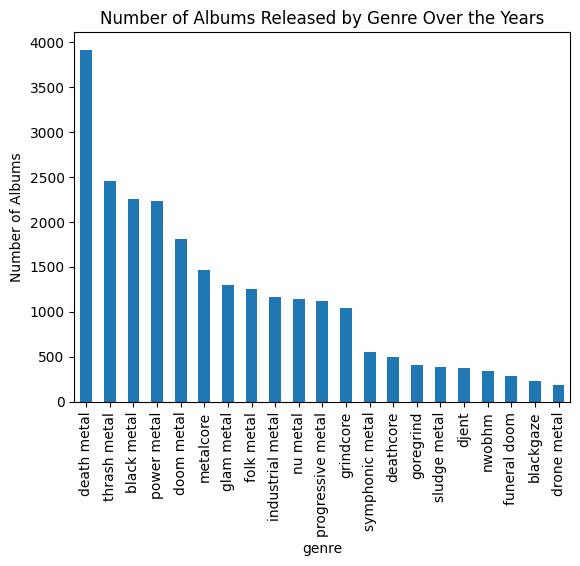

In [4]:
dfgroup.plot(kind='bar')
plt.title('Number of Albums Released by Genre Over the Years')

plt.ylabel('Number of Albums')

plt.show()

In [20]:
tracks = pd.read_csv('tracks.csv')
tracks.drop_duplicates(inplace=True)
tracks_pivot = tracks.pivot_table(index='genre', columns='preview_downloaded', aggfunc='count', margins=True)
sorted_pivot = tracks_pivot.sort_values(by=tracks_pivot.columns[-1], ascending=False)
display(sorted_pivot['album_id'])

preview_downloaded,N,Y,All
genre,,,
All,17653,259377,277030
death metal,2490,40534,43024
thrash metal,1801,27500,29301
power metal,824,25711,26535
black metal,244,20176,20420
metalcore,2683,14174,16857
glam metal,2810,14000,16810
doom metal,538,16097,16635
grindcore,696,15372,16067
